# YoloV11 KeyPoint (Pose) Detection

In [1]:
# Mount Drive Folder to Colab [Local]

from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov11-keypoints
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov11-keypoints
runs  test_images  yolo11s-pose.pt  yolov11_keypoints.ipynb


In [2]:
print("\033[1;3;92;40m  ========== Installing Requirements ==========  \033[0m")

!pip install -q ultralytics

  ========== Installing Requirements ==========  
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00


In [10]:
test_image = "/content/gdrive/MyDrive/yolov11-keypoints/test_images/male.jpg"

result1 = "runs/pose/predict"

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11s-pose")
results = model(test_image, save=True)


image 1/1 /content/gdrive/MyDrive/yolov11-keypoints/test_images/male.jpg: 384x640 1 person, 325.8ms
Speed: 3.0ms preprocess, 325.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict3


# *Results*

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np

In [5]:
import sys
import time

def progress_bar_run(total, fg="█", color_txt="\033[3;30;92m"):
  if total == 1:
    total = 100
  else:
    total = total
  for i in range(total+1):
    bar = fg * i + " " * (total - i)
    sys.stdout.write(f"\r {color_txt} {bar}\033[0m [ {int(i/total*100)}% ]")
    sys.stdout.flush()
    time.sleep(0.1)
  print()

  >>>>>>>>>>  Result  >>>>>>>>>>  



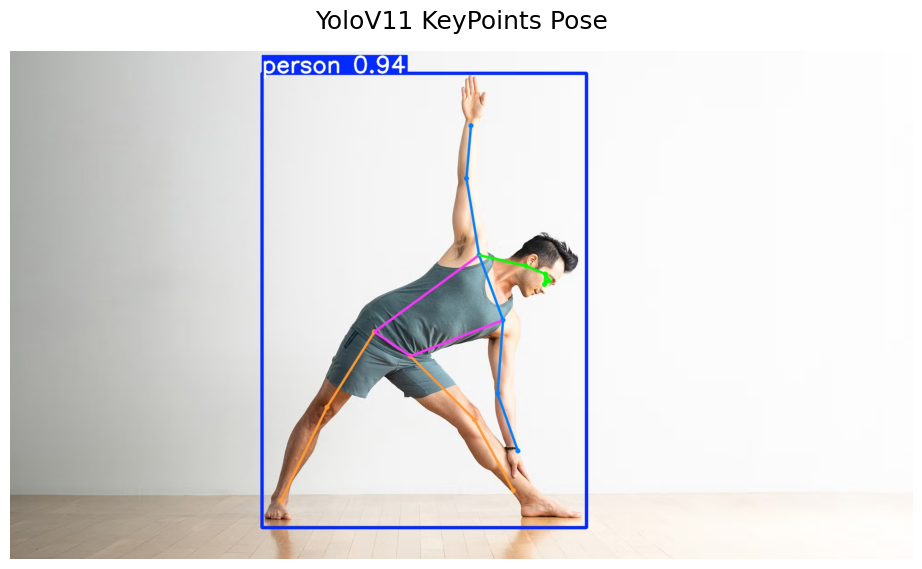

In [6]:
def show_img(results):
  print(f"\033[3;30;102m  >>>>>>>>>>  Result  >>>>>>>>>>  \033[0m\n")

  files = [f for f in os.listdir(results) if f.lower().endswith((".png", ".jpg",".jpeg"))]

  fig, axes = plt.subplots(1, 1, figsize = (7 * len(results), 5.38))
  if len(files) == 1:
    axes = [axes]

  for i , img in enumerate(files):
    img_path = os.path.join(results, img)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].axis('off')
    # progress_bar_run(len(results)) # Show Progress Bar
  plt.tight_layout()
  fig.suptitle("YoloV11 KeyPoints Pose", fontsize=18, y=1.05)
  plt.show()

show_img(result1)

In [26]:
def show_in_nx3_grid(result_file_path):
  print("Display in nx3 grid \n")
  files_res = [f for f in os.listdir(result_file_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

  # calculate rows needed (3 images per row)
  row = math.ceil(len(files_res) / 3)

  fig, axes = plt.subplots(row, 3, figsize=(7 * row, 5.38))

  # if only one row, axes is 1D
  axes = axes.flatten() if row > 1 else axes

  for i, image_file in enumerate(files_res):
      image_path = os.path.join(result_file_path, image_file)
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      axes[i].imshow(image)
      axes[i].set_title(os.path.splitext(files_res[i])[0], fontsize=8, pad=10)
      axes[i].axis('off')

  # hide any unused axes
  for j in range(len(files_res), len(axes)):
      axes[j].axis('off')

  plt.tight_layout()           # removes padding around the whole figure
  fig.suptitle("YoloV9 KeyPoints Pose", fontsize=18, y=1.05)
  plt.show()

  >>>>>>>>>>  Result Overlays  >>>>>>>>>>  

Display in nx3 grid 



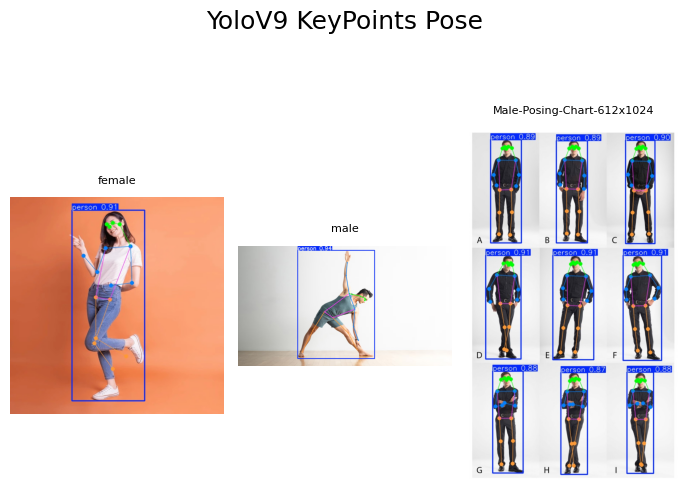

In [68]:
print(f"\033[3;30;102m  >>>>>>>>>>  Result Overlays  >>>>>>>>>>  \033[0m\n")
show_in_nx3_grid(result1)